---

## **Plotando Mapa de Relevo**

---

**OBJETIVO:** Aprender a plotar mapa de relevo.

---

**DADOS DE ENTRADA:** São utilizados os dados de relevo disponibilizados pela bibblioteca [bmi-topography](https://bmi-topography.readthedocs.io/en/latest/). Existem os seguintes dados:
- SRTMGL3 (SRTM GL3 90m)
- SRTMGL1 (SRTM GL1 30m)
- SRTMGL1_E (SRTM GL1 Ellipsoidal 30m)
- AW3D30 (ALOS World 3D 30m)
- AW3D30_E (ALOS World 3D Ellipsoidal, 30m)
- SRTM15Plus (Global Bathymetry SRTM15+ V2.1)
- NASADEM (NASADEM Global DEM)
- COP30 (Copernicus Global DSM 30m)
- COP90 (Copernicus Global DSM 90m)

---

**DADOS DE SAÍDA:** Figura
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo PNG
- **Imagens geradas:**
    1. script_07_Fig_3_mapa_relevo_itajuba.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:

1.   **Instalação** das bibliotecas
2.   **Importação** das biblotecas
3.   Montagem do **drive online**
4.   Define caminho do drive
5.   Plota um exemplo simples de relevo
6.   Plota relevo de Itajubá


---

**OBSERVAÇÕES IMPORTANTES**:
1. Código criado para ser processado no Google Colab
2. Mudar o caminho para o do seu drive.

---

- **Realizado por:** Enrique V. Mattos - 30/03/2024
- **Atualizado por:** Enrique V. Mattos - 31/03/2024


# **1° Passo:** Instalando as bibliotecas

In [1]:
# Instalando matplotlib, proplot e numpy
!pip install -q matplotlib==3.4.3
!pip install -q proplot==0.9.7
!pip install -q numpy==1.24.3

# Instalando salem
!pip install -q salem==0.3.9

# Instalando rasterio, pyproj e geopandas
!pip install -q rasterio pyproj geopandas

# Instalando biblioteca de topografia
!pip install -q bmi-topography

# Instalando cartopy
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Successfully uninstalled shapely-2.0.3


- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da disciplina.

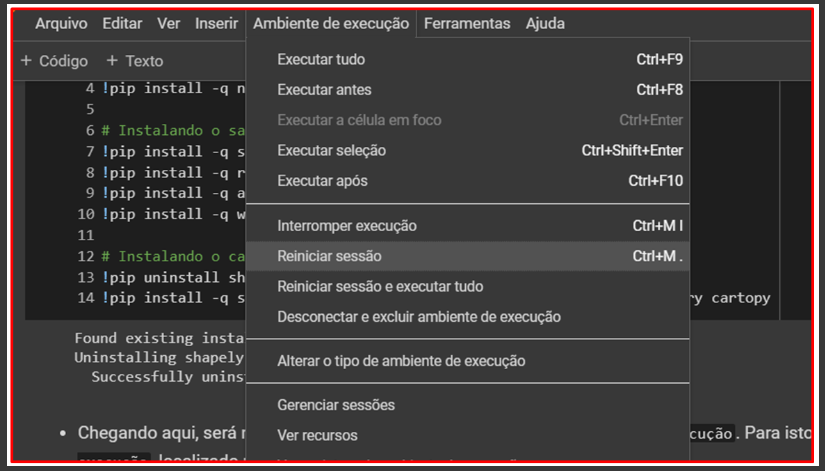

# **2° Passo:** Importando bibliotecas

In [2]:
import numpy as np                          # Biblioteca para trabalhar com matrizes
import proplot as pplt                      # Biblioteca para gerar figuras
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import salem
import time
from bmi_topography import Topography

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **3° Passo:** Montando Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório

In [4]:
# nome do diretório
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/2_RELEVO/'

In [5]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

#**PARTE 1:** Plota relevo através de um `exemplo simples`

<xarray.DataArray 'SRTMGL3' (band: 1, y: 264, x: 480)>
[126720 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -45.6 -45.6 -45.6 -45.6 ... -45.2 -45.2 -45.2 -45.2
  * y            (y) float64 -22.33 -22.33 -22.33 ... -22.55 -22.55 -22.55
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0
    units:          degrees 



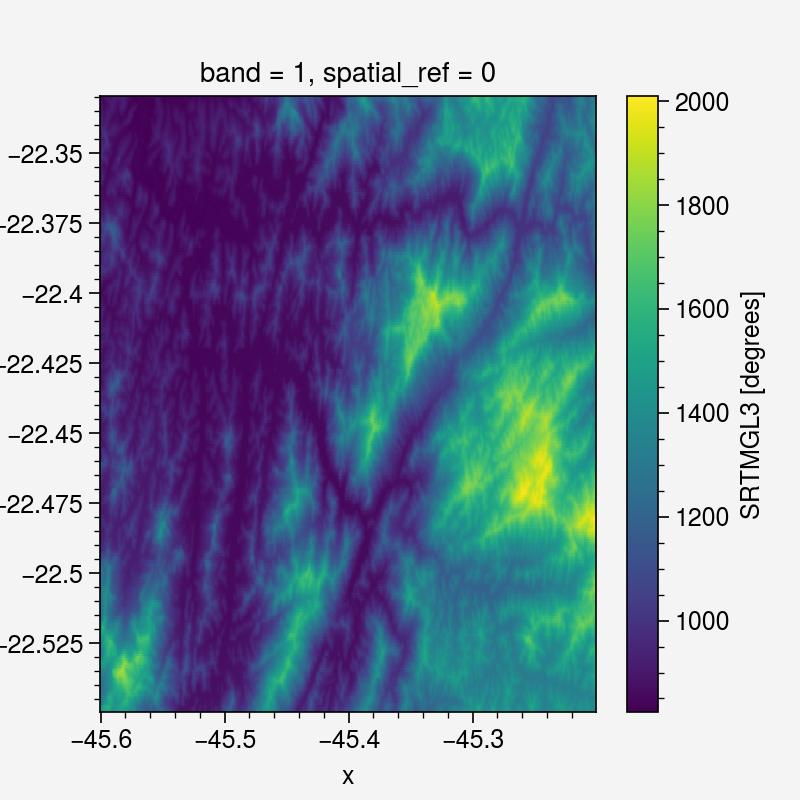

In [6]:
!pip install -q bmi-topography
from bmi_topography import Topography
lonmin, lonmax, latmin, latmax = -45.6, -45.2, -22.55, -22.33

topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")

da = topo.load()
print(da,'\n')

import matplotlib
da.plot()

In [7]:
da

<xarray.DataArray 'SRTMGL3' (band: 1, y: 264, x: 480)>
[126720 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -45.6 -45.6 -45.6 -45.6 ... -45.2 -45.2 -45.2 -45.2
  * y            (y) float64 -22.33 -22.33 -22.33 ... -22.55 -22.55 -22.55
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0
    units:          degrees

In [8]:
da[0,:,:]

<xarray.DataArray 'SRTMGL3' (y: 264, x: 480)>
[126720 values with dtype=int16]
Coordinates:
    band         int64 1
  * x            (x) float64 -45.6 -45.6 -45.6 -45.6 ... -45.2 -45.2 -45.2 -45.2
  * y            (y) float64 -22.33 -22.33 -22.33 ... -22.55 -22.55 -22.55
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0
    units:          degrees

In [9]:
da['x']

<xarray.DataArray 'x' (x: 480)>
array([-45.6     , -45.599167, -45.598333, ..., -45.2025  , -45.201667,
       -45.200833])
Coordinates:
  * x            (x) float64 -45.6 -45.6 -45.6 -45.6 ... -45.2 -45.2 -45.2 -45.2
    spatial_ref  int64 0

In [10]:
da['y']

<xarray.DataArray 'y' (y: 264)>
array([-22.33    , -22.330833, -22.331667, ..., -22.5475  , -22.548333,
       -22.549167])
Coordinates:
  * y            (y) float64 -22.33 -22.33 -22.33 ... -22.55 -22.55 -22.55
    spatial_ref  int64 0

#**PARTE 2:** Plota figura de relevo: `Itajubá`

CPU times: user 3.66 s, sys: 719 ms, total: 4.38 s
Wall time: 3.99 s


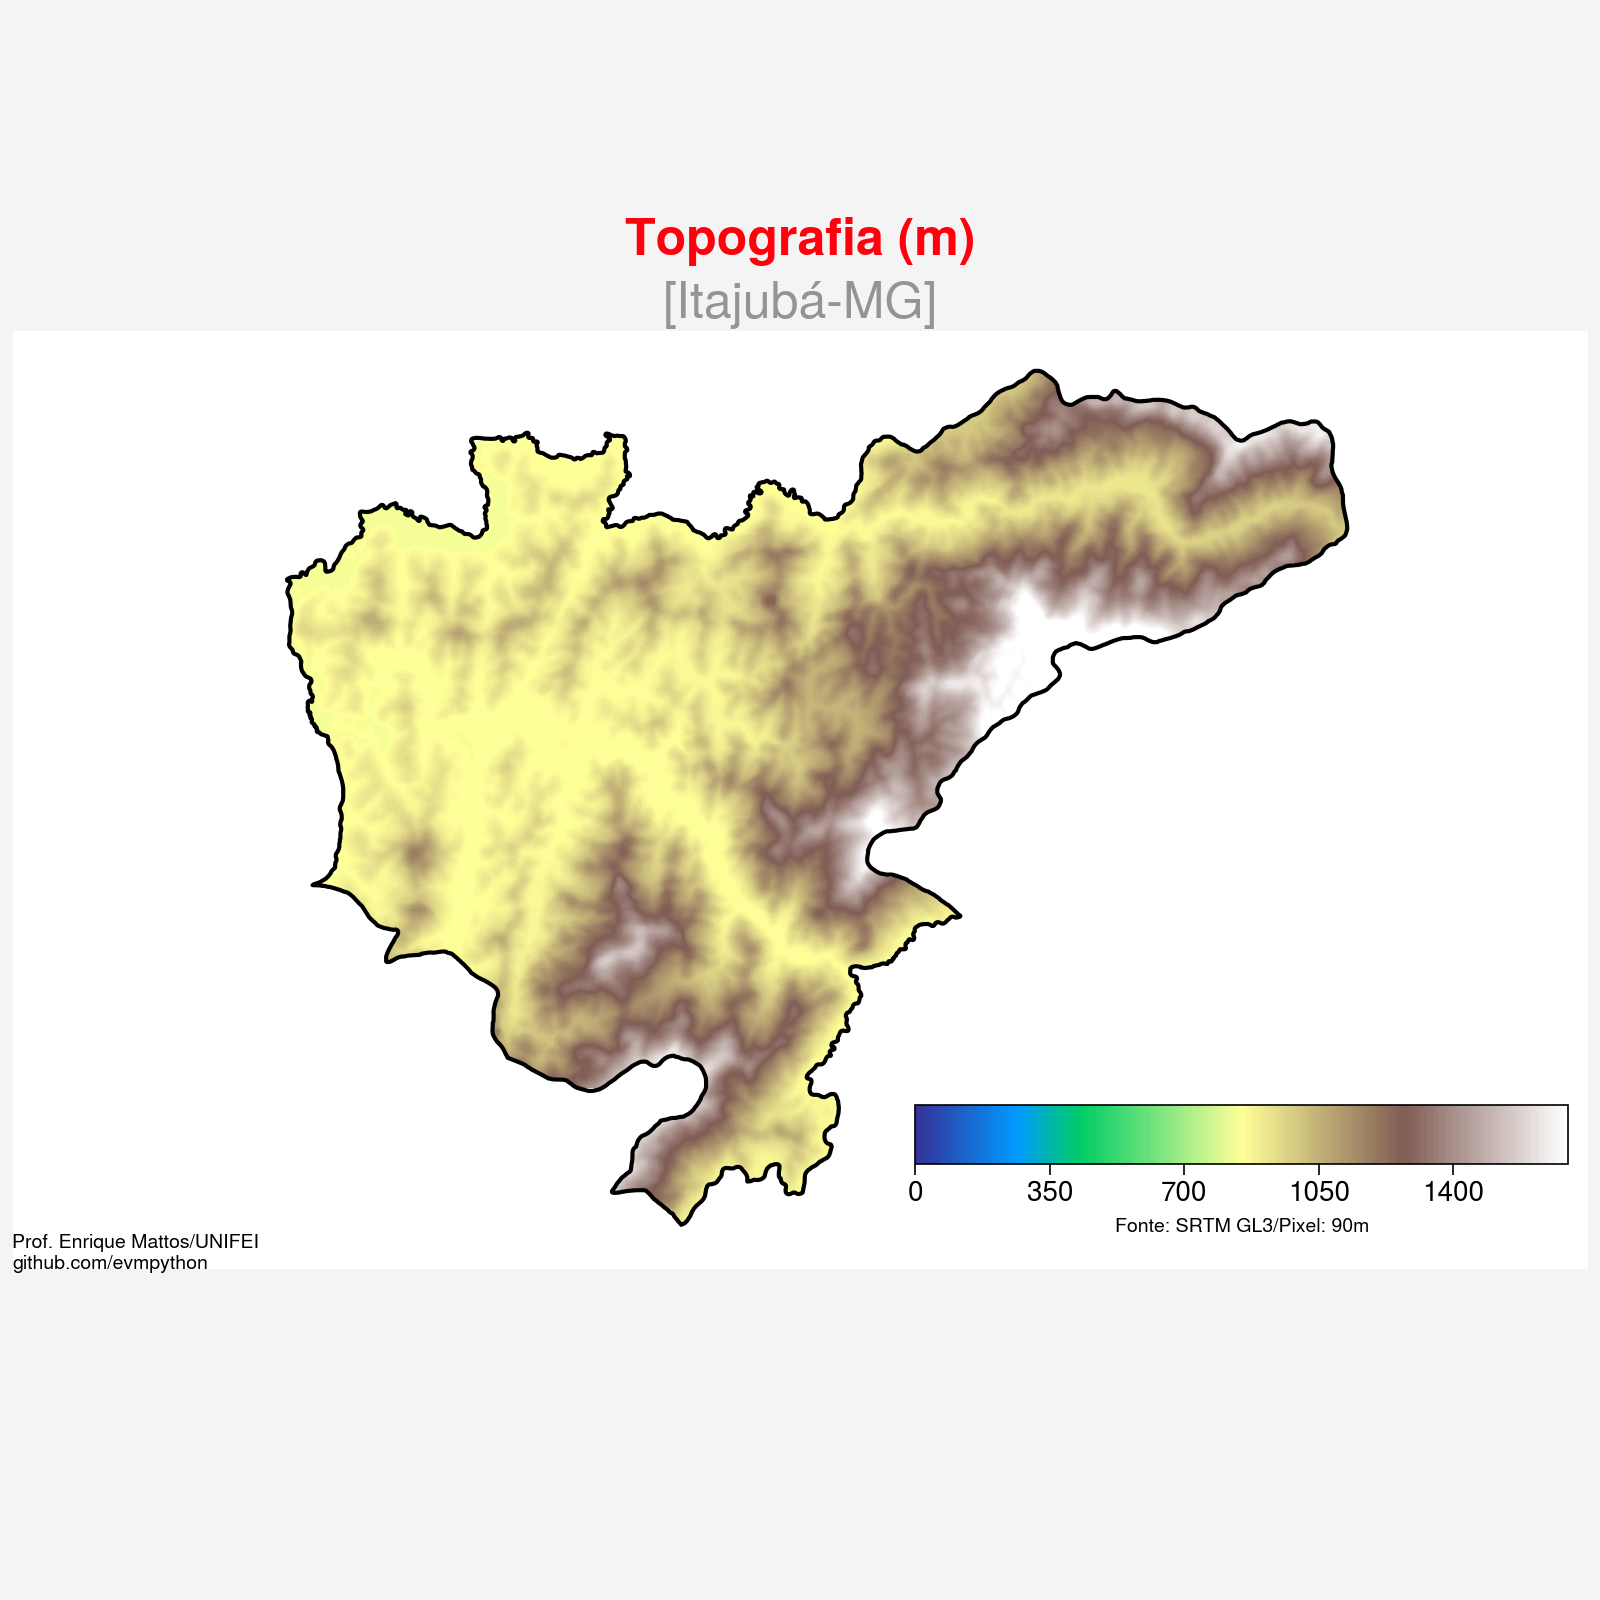

In [13]:
%%time
#========================================================================================================================#
#                                           LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = -45.6, -45.2, -22.55, -22.33

#========================================================================================================================#
#                                           LEITURA DOS SHAPEFILES
#========================================================================================================================#
itajuba = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/itajuba/itajuba.shp')

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")

da = topo.load()

#========================================================================================================================#
#                                           PLOTA FIGURA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(8,8), tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Topografia (m)',
          suptitlecolor='bright red',
          suptitleweight='bold',
          suptitlesize='large',
          title='[Itajubá-MG]',
          titlesize='med',
          titleloc='c',
          titleweight='normal',
          titlecolor='grey',
          small='20px', large='25px',
          linewidth=0, grid=False)

# plota mapa
map1 = ax.contourf(da['x'],
                   da['y'],
                   da[0,:,:].salem.roi(shape=itajuba),
                   cmap='terrain',
                   vmin=0, vmax=1700,
                   levels=pplt.arange(0, 1700, 10),
                   colorbar='best',
                   colorbar_kw={'label': 'Fonte: SRTM GL3/Pixel: 90m',
                                'length': 24,
                                'frameon': False,
                                'ticklabelsize': 10,
                                'labelsize': 7,
                                'width': 2})

# plota contorno de Itajubá
itajuba.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# informação na figura
ax.annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(lonmin,latmin), fontsize=7, color='black')

# salva figura
fig.save(f'{dir}output/script_07_Fig_1_mapa_relevo_itajuba.png', dpi=300, bbox_inches='tight')